# Webscraping some stock market data and analysing it

## Libraries

In [1]:
import requests
from bs4 import BeautifulSoup

## Scraping Daily FTSE 100 Data From London Stock Exchange Website

In [2]:
# get website for the ftse 100
url = 'https://www.londonstockexchange.com/indices/ftse-100/constituents/table'
website = requests.get(url).text
soup = BeautifulSoup(website, 'lxml')

In [3]:
# check if access to website
requests.get(url)

<Response [200]>

#### Company code, name, currency, market cap, price, change, change %

In [4]:
# create empty list to append to
code, name, currency, mc, price, change, p_change = ([] for i in range(7))

In [5]:
# get all data
company_code = soup.find_all(class_='clickable bold-font-weight instrument-tidm gtm-trackable td-with-link')
company_name = soup.find_all(class_='clickable instrument-name gtm-trackable td-with-link')
company_currency = soup.find_all(class_='instrument-currency hide-on-landscape')
company_mc = soup.find_all(class_='instrument-marketcapitalization hide-on-landscape')
company_price = soup.find_all(class_='instrument-lastprice')
company_change = soup.find_all(class_='instrument-netchange hide-on-landscape positivechange')
company_p_change = soup.find_all(class_='instrument-percentualchange hide-on-landscape gtm-trackable')

In [6]:
# append to list
for x in range(len(company_code)):
    code.append(company_code[x].text)
    name.append(company_name[x].text)
    currency.append(company_currency[x].text)
    mc.append(company_mc[x].text)
    price.append(company_price[x].text)
    change.append(company_change[x].text)
    p_change.append(company_p_change[x].text)

In [7]:
# print data to check
print(code)
print(name)
print(len(code))
print(len(name))

['IHG', 'RR.', 'IAG', 'WTB', 'LAND', 'FLTR', 'CPG', 'MRO', 'HLMA', 'SKG', 'LLOY', 'ENT', 'TW.', 'ABF', 'INF', 'PSN', 'LGEN', 'RKT', 'III', 'SGRO']
['INTERCONTINENTAL HOTELS GROUP PLC ORD 20 340/399P', 'ROLLS-ROYCE HOLDINGS PLC ORD SHS 20P', 'INTL CONSOLIDATED AIRLINES GROUP SA ORD EUR0.10 (CDI)', 'WHITBREAD PLC ORD 76 122/153P', 'LAND SECURITIES GROUP PLC ORD 10 2/3P', 'FLUTTER ENTERTAINMENT PLC ORD EUR0.09 (CDI)', 'COMPASS GROUP PLC ORD 11 1/20P', 'MELROSE INDUSTRIES PLC ORDS 160/21P', 'HALMA PLC ORD 10P', 'SMURFIT KAPPA GROUP PLC ORD EUR0.001 (CDI)', 'LLOYDS BANKING GROUP PLC ORD 10P', 'ENTAIN PLC ORD EUR0.01', 'TAYLOR WIMPEY PLC ORD 1P', 'ASSOCIATED BRITISH FOODS PLC ORD 5 15/22P', 'INFORMA PLC ORD 0.1P', 'PERSIMMON PLC ORD 10P', 'LEGAL & GENERAL GROUP PLC ORD 2 1/2P', 'RECKITT BENCKISER GROUP PLC ORD 10P', '3I GROUP PLC ORD 73 19/22P', 'SEGRO PLC ORD 10P']
20
20


#### Now loop through all the pages

In [8]:
import re # add regex to as one of the classes slightly differ, so had to make sure it gets all of them

In [9]:
# create empty list to append to
code, name, currency, mc, price, change, p_change = ([] for i in range(7))

In [10]:
# create a function to scrape the data, which will be used over 5 different pages
def data_collection():
    # get all data
    company_code = soup.find_all(class_=re.compile('clickable bold-font-weight instrument-tidm gtm-trackable td-with-link'))
    company_name = soup.find_all(class_=re.compile('clickable instrument-name gtm-trackable td-with-link'))
    company_currency = soup.find_all(class_=re.compile('instrument-currency hide-on-landscape'))
    company_mc = soup.find_all(class_=re.compile('instrument-marketcapitalization hide-on-landscape'))
    company_price = soup.find_all(class_=re.compile('instrument-lastprice'))
    company_change = soup.find_all(class_=re.compile('instrument-netchange hide-on-landscape'))
    company_p_change = soup.find_all(class_=re.compile('instrument-percentualchange hide-on-landscape gtm-trackable'))

    # append to list
    for x in range(len(company_code)):
        code.append(company_code[x].text)
        name.append(company_name[x].text)
        currency.append(company_currency[x].text)
        mc.append(company_mc[x].text)
        price.append(company_price[x].text)
        change.append(company_change[x].text)
        p_change.append(company_p_change[x].text)

In [11]:
# find out how many pages to iterate over
list_of_pages = soup.find_all('a', class_='page-number')
print(len(list_of_pages))

5


In [12]:
# loop through each website page
n = 1 # start iteration at page 1

while n < len(list_of_pages) + 1:
    url = f'https://www.londonstockexchange.com/indices/ftse-100/constituents/table?page={n}'
    website = requests.get(url).text
    soup = BeautifulSoup(website, 'lxml')
    
    # run function to scrape
    data_collection()
    print(url)
    
    # count
    n += 1

https://www.londonstockexchange.com/indices/ftse-100/constituents/table?page=1
https://www.londonstockexchange.com/indices/ftse-100/constituents/table?page=2
https://www.londonstockexchange.com/indices/ftse-100/constituents/table?page=3
https://www.londonstockexchange.com/indices/ftse-100/constituents/table?page=4
https://www.londonstockexchange.com/indices/ftse-100/constituents/table?page=5


In [13]:
# verify
print(len(code), len(change), len(name))
print(code)

100 100 100
['IHG', 'RR.', 'IAG', 'WTB', 'LAND', 'FLTR', 'CPG', 'MRO', 'HLMA', 'SKG', 'LLOY', 'ENT', 'TW.', 'ABF', 'INF', 'PSN', 'LGEN', 'RKT', 'III', 'SGRO', 'SBRY', 'ICP', 'BRBY', 'STAN', 'BDEV', 'FERG', 'BARC', 'AV.', 'NXT', 'SPX', 'PSH', 'DGE', 'REL', 'HSBA', 'NWG', 'BA.', 'SDR', 'BKG', 'BLND', 'PRU', 'ANTO', 'BP.', 'RIO', 'AAL', 'CRDA', 'SHEL', 'RTO', 'ITRK', 'LSEG', 'TSCO', 'AUTO', 'VOD', 'MNDI', 'AZN', 'HIK', 'EXPN', 'ABDN', 'SSE', 'WPP', 'KGF', 'MNG', 'SGE', 'STJ', 'SN.', 'PHNX', 'MGGT', 'CRH', 'JD.', 'BATS', 'ECM', 'DCC', 'NG.', 'SVT', 'RMG', 'ADM', 'SMIN', 'ULVR', 'BNZL', 'AHT', 'AVST', 'BME', 'EDV', 'SMDS', 'GSK', 'AAF', 'UU.', 'SMT', 'IMB', 'HL.', 'GLEN', 'PSON', 'RMV', 'HWDN', 'BT.A', 'AVV', 'CCH', 'OCDO', 'FRES', 'ITV', 'DPH']


#### Find out more information for each of the companies data extracted

By clicking on the name of each company, you can get: volume, turnover, earnings per share, issue date

In [14]:
# load up soup again as it changed from the loop
url = 'https://www.londonstockexchange.com/indices/ftse-100/constituents/table?page=1'
website = requests.get(url).text
soup = BeautifulSoup(website, 'lxml')

In [15]:
# get links for each company: you can get it by clicking on the name: the links have the code in them so use that
company_name_link = soup.find_all('a')
for link in company_name_link:
    if re.search(code[0], link.text):
        print(link.get('href'))

stock/IHG/intercontinental-hotels-group-plc


In [16]:
# empty array of links
links = []

# count initialisation from 0 - 100 codes
counter = 0

In [17]:
# loop through each name in the list obtained and find the corresponding link on its page
company_name_link = soup.find_all('a')

for x in range(int(len(code) / len(list_of_pages))):
    for link in company_name_link:
        if re.search(f'{code[counter]}', link.text):
            links.append(link.get('href'))
    counter += 1
           
# remove any duplicates
links = list(dict.fromkeys(links))

In [18]:
print(links)
print(len(links))
print(counter)

['stock/IHG/intercontinental-hotels-group-plc', 'stock/RR./rolls-royce-holdings-plc', 'stock/IAG/international-consolidated-airlines-group-s-a', 'stock/WTB/whitbread-plc', 'stock/LAND/land-securities-group-plc', 'stock/FLTR/flutter-entertainment-plc', 'stock/CPG/compass-group-plc', 'stock/MRO/melrose-industries-plc', 'stock/HLMA/halma-plc', 'stock/SKG/smurfit-kappa-group-plc', 'stock/LLOY/lloyds-banking-group-plc', 'stock/ENT/entain-plc', 'stock/TW./taylor-wimpey-plc', 'stock/ABF/associated-british-foods-plc', 'stock/INF/informa-plc', 'stock/PSN/persimmon-plc', 'stock/LGEN/legal-general-group-plc', 'stock/RKT/reckitt-benckiser-group-plc', 'stock/III/3i-group-plc', 'stock/SGRO/segro-plc']
20
20


#### Now loop through all the pages

In [19]:
# empty array of links
links = []

In [20]:
def more_data_collection(counter):
    # loop through each name in the list obtained and find the corresponding link on its page
    company_name_link = soup.find_all('a')

    for x in range(int(len(code) / len(list_of_pages))):
        for link in company_name_link:
            if re.search(f'{code[counter]}', link.text):
                links.append(link.get('href'))
        counter += 1

In [21]:
# loop through each website page
n = 1 # start iteration at page 1
z = 0 # iterate through 1-100 of the companies

while n < len(list_of_pages) + 1:
    url = f'https://www.londonstockexchange.com/indices/ftse-100/constituents/table?page={n}'
    website = requests.get(url).text
    soup = BeautifulSoup(website, 'lxml')
    
    # run function to scrape
    more_data_collection(z)
    
    # count
    n += 1
    z += 20
    
# remove any duplicates
links = list(dict.fromkeys(links))

In [22]:
x = 0
for link in links:
    print(f'{x}: {link}')
    x += 1

0: stock/IHG/intercontinental-hotels-group-plc
1: stock/RR./rolls-royce-holdings-plc
2: stock/IAG/international-consolidated-airlines-group-s-a
3: stock/WTB/whitbread-plc
4: stock/LAND/land-securities-group-plc
5: stock/FLTR/flutter-entertainment-plc
6: stock/CPG/compass-group-plc
7: stock/MRO/melrose-industries-plc
8: stock/HLMA/halma-plc
9: stock/SKG/smurfit-kappa-group-plc
10: stock/LLOY/lloyds-banking-group-plc
11: stock/ENT/entain-plc
12: stock/TW./taylor-wimpey-plc
13: stock/ABF/associated-british-foods-plc
14: stock/INF/informa-plc
15: stock/PSN/persimmon-plc
16: stock/LGEN/legal-general-group-plc
17: stock/RKT/reckitt-benckiser-group-plc
18: stock/III/3i-group-plc
19: stock/SGRO/segro-plc
20: stock/SBRY/sainsbury-j-plc
21: stock/ICP/intermediate-capital-group-plc
22: stock/BRBY/burberry-group-plc
23: stock/STAN/standard-chartered-plc
24: stock/BDEV/barratt-developments-plc
25: stock/FERG/ferguson-plc
26: stock/BARC/barclays-plc
27: stock/AV./aviva-plc
28: stock/NXT/next-plc
29:

In [23]:
# three links for LSEG. Clean data
final_link_list = []
for link in links:
    if re.search('^stock/', link):
        final_link_list.append(link)

In [24]:
len(final_link_list)

100

#### now that a list of the links have all been collected, use the links to get the relevant information

In [25]:
# list of new variables
volume, turnover, eps, issue_date, date = ([] for i in range(5))

In [26]:
# get page of each link
n = 0
url = f'https://www.londonstockexchange.com/{final_link_list[n]}'
website = requests.get(url).text
soup = BeautifulSoup(website, 'lxml')

In [27]:
print(url)

https://www.londonstockexchange.com/stock/IHG/intercontinental-hotels-group-plc


In [28]:
# get relevant parameters for the variables list
company_volume = soup.find(id='chart-table') # can only use id because of javascript

In [29]:
# get relevant parameters for the variables list
# can only use id because of javascript, changing values: navigating down the tree
company_volume = soup.select('#chart-table > div > div:nth-child(2) > .index-item ') # gets what I need: change last number to navigate to different values
for x in company_volume:
    print(f'{x.text}\n')

 Open price 5,020.00

 Previous close price / date 5,192.00 / 14 April 2022

 Volume 859,263

 Turnover (on book) £22,694,359.08

 Market Main Market

 Instrument market cap (£m) 9,175.05

 Earnings per share 1.45

 Issue date 14 January 2019

 ISIN GB00BHJYC057

 SEDOL BHJYC05

 Market identifier code (MIC) XLON

 Country of share register GB

 Market segment SET1

 Trading service SETS



In [30]:
company_volume = soup.select('#chart-table > div:nth-child(1) > div:nth-child(2) > .index-item')[2].text.split(' ')[-1]
print(company_volume)

company_eps = soup.select('#chart-table > div:nth-child(3) > div:nth-child(2) > .index-item')[2].text.split(' ')[-1]
print(company_eps)

company_turnover =  soup.select('#chart-table > div:nth-child(1) > div:nth-child(2) > .index-item')[3].text.split(' ')[-1]
print(company_turnover)

company_issue_date = soup.select('#chart-table > div:nth-child(3) > div:nth-child(2) > .index-item')[3].text.split(' ')[3:]
company_issue_date = ' '.join(company_issue_date)
print(company_issue_date)

date_of_stock_data = soup.select('#ticker > div > div > div.flex-wrapper.ticker-fields > div.ticker-item.delay > div > .bold-font-weight')
for x in date_of_stock_data:
    print(x.text)

859,263
1.45
£22,694,359.08
14 January 2019
18.04.22 20:12:34


#### loop for every link in list

In [31]:
def variables():
    company_volume = soup.select('#chart-table > div:nth-child(1) > div:nth-child(2) > .index-item')[2].text.split(' ')[-1]
    volume.append(company_volume)

    company_eps = soup.select('#chart-table > div:nth-child(3) > div:nth-child(2) > .index-item')[2].text.split(' ')[-1]
    eps.append(company_eps)

    company_turnover =  soup.select('#chart-table > div:nth-child(1) > div:nth-child(2) > .index-item')[3].text.split(' ')[-1]
    turnover.append(company_turnover)

    company_issue_date = soup.select('#chart-table > div:nth-child(3) > div:nth-child(2) > .index-item')[3].text.split(' ')[3:]
    company_issue_date = ' '.join(company_issue_date)
    issue_date.append(company_issue_date)
    
    date_of_stock_data = soup.select('#ticker > div > div > div.flex-wrapper.ticker-fields > div.ticker-item.delay > div > .bold-font-weight')
    for x in date_of_stock_data:
        date.append(x.text)

In [32]:
for link in final_link_list:
    url = f'https://www.londonstockexchange.com/{link}'
    website = requests.get(url).text
    soup = BeautifulSoup(website, 'lxml')
    
    variables()
    
print('Data collected!')

Data collected!


In [33]:
print(len(volume))

100


#### Move lists to dataframe

In [34]:
import pandas as pd

In [35]:
df = pd.DataFrame({'Date':date, 'Code':code, 'Company Name':name, 'Currency': currency, 'Market Cap (million)': mc, 'Price': price, 'Change':change, 'Percentage Change':p_change, 'Volume':volume, 'Turnover':turnover, 'Earnings Per Share':eps, 'Issue Date':issue_date })

In [36]:
df.head()

,Date,Code,Company Name,Currency,Market Cap (million),Price,Change,Percentage Change,Volume,Turnover,Earnings Per Share,Issue Date
0,18.04.22 20:12:38,IHG,INTERCONTINENTAL HOTELS GROUP PLC ORD 20 340/399P,GBX,"9,175.05","5,192.00",206.00,4.13%,"859,263","£22,694,359.08",1.45,14 January 2019
1,18.04.22 20:12:38,RR.,ROLLS-ROYCE HOLDINGS PLC ORD SHS 20P,GBX,"7,533.35",93.43,3.40,3.78%,"53,922,130","£33,602,364.86",-0.53,23 May 2011
2,18.04.22 20:12:39,IAG,INTL CONSOLIDATED AIRLINES GROUP SA ORD EUR0.1...,GBX,"6,967.59",145.48,5.18,3.69%,"25,606,326","£23,225,393.33",-1.96,02 February 2011
3,18.04.22 20:12:40,WTB,WHITBREAD PLC ORD 76 122/153P,GBX,"5,680.74","2,915.00",103.00,3.66%,"2,633,231","£19,018,713.51",-4.82,08 January 2007
4,18.04.22 20:12:41,LAND,LAND SECURITIES GROUP PLC ORD 10 2/3P,GBX,"5,549.30",770.80,22.40,2.99%,"2,057,500","£12,771,069.43",-1.88,28 September 2017


In [37]:
# Clean data
df['Percentage Change'] = df['Percentage Change'].str.replace('%','')
df['Turnover'] = df['Turnover'].str.replace('£','')
df['Date'] = pd.to_datetime(df['Date']).dt.date
df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d')

df.head()

,Date,Code,Company Name,Currency,Market Cap (million),Price,Change,Percentage Change,Volume,Turnover,Earnings Per Share,Issue Date
0,2022-04-18,IHG,INTERCONTINENTAL HOTELS GROUP PLC ORD 20 340/399P,GBX,"9,175.05","5,192.00",206.00,4.13,"859,263","22,694,359.08",1.45,14 January 2019
1,2022-04-18,RR.,ROLLS-ROYCE HOLDINGS PLC ORD SHS 20P,GBX,"7,533.35",93.43,3.40,3.78,"53,922,130","33,602,364.86",-0.53,23 May 2011
2,2022-04-18,IAG,INTL CONSOLIDATED AIRLINES GROUP SA ORD EUR0.1...,GBX,"6,967.59",145.48,5.18,3.69,"25,606,326","23,225,393.33",-1.96,02 February 2011
3,2022-04-18,WTB,WHITBREAD PLC ORD 76 122/153P,GBX,"5,680.74","2,915.00",103.00,3.66,"2,633,231","19,018,713.51",-4.82,08 January 2007
4,2022-04-18,LAND,LAND SECURITIES GROUP PLC ORD 10 2/3P,GBX,"5,549.30",770.80,22.40,2.99,"2,057,500","12,771,069.43",-1.88,28 September 2017


In [38]:
df['Date'].dtype

dtype('<M8[ns]')

In [39]:
# Remove the '-' from the change and p change column
df['Change'][64]

' - '

In [40]:
df['Change'] = df['Change'].replace([' - '],'0')
df['Percentage Change'] = df['Percentage Change'].replace([' - '],'0')

In [41]:
# the negative signs in earnings per share causing problems with conversion to float
import numpy as np

df['Earnings Per Share'] = df['Earnings Per Share'].replace('-',np.nan)

In [42]:
# Change datatype of all strings that look like numbers to actual numbers
df[['Market Cap (million)', 'Price', 'Change', 'Percentage Change', 'Volume', 'Turnover', 'Earnings Per Share']] = df[['Market Cap (million)', 'Price', 'Change', 'Percentage Change', 'Volume', 'Turnover', 'Earnings Per Share']].apply(lambda x: x.str.replace(',','').astype(float))
df

,Date,Code,Company Name,Currency,Market Cap (million),Price,Change,Percentage Change,Volume,Turnover,Earnings Per Share,Issue Date
0,2022-04-18,IHG,INTERCONTINENTAL HOTELS GROUP PLC ORD 20 340/399P,GBX,9175.05,5192.00,206.00,4.13,859263.0,22694359.08,1.45,14 January 2019
1,2022-04-18,RR.,ROLLS-ROYCE HOLDINGS PLC ORD SHS 20P,GBX,7533.35,93.43,3.40,3.78,53922130.0,33602364.86,-0.53,23 May 2011
2,2022-04-18,IAG,INTL CONSOLIDATED AIRLINES GROUP SA ORD EUR0.1...,GBX,6967.59,145.48,5.18,3.69,25606326.0,23225393.33,-1.96,02 February 2011
3,2022-04-18,WTB,WHITBREAD PLC ORD 76 122/153P,GBX,5680.74,2915.00,103.00,3.66,2633231.0,19018713.51,-4.82,08 January 2007
4,2022-04-18,LAND,LAND SECURITIES GROUP PLC ORD 10 2/3P,GBX,5549.30,770.80,22.40,2.99,2057500.0,12771069.43,-1.88,28 September 2017
...,...,...,...,...,...,...,...,...,...,...,...,...
95,2022-04-18,CCH,COCA-COLA HBC AG ORD CHF6.70 (CDI),GBX,5946.87,1583.00,-16.50,-1.03,924445.0,10467604.66,1.14,29 April 2013
96,2022-04-18,OCDO,OCADO GROUP PLC ORD 2P,GBX,8671.12,1138.50,-15.00,-1.30,1864471.0,10475271.82,-0.18,21 July 2010
97,2022-04-18,FRES,FRESNILLO PLC ORD USD0.50,GBX,6063.16,804.00,-18.80,-2.28,1335202.0,6922502.96,0.51,22 September 2008
98,2022-04-18,ITV,ITV PLC ORD 10P,GBX,3184.10,77.02,-2.08,-2.63,13399626.0,7506304.75,0.09,22 September 2008


In [43]:
# Create new columns
df['Day'] = df['Date'].dt.day
df['Month'] = df['Date'].dt.month
df['Year'] = df['Date'].dt.year

In [44]:
# change issue date to datetime format
df['Issue Date'] = pd.to_datetime(df['Issue Date'])

In [45]:
daily_FTSE = df
daily_FTSE.head()

,Date,Code,Company Name,Currency,Market Cap (million),Price,Change,Percentage Change,Volume,Turnover,Earnings Per Share,Issue Date,Day,Month,Year
0,2022-04-18,IHG,INTERCONTINENTAL HOTELS GROUP PLC ORD 20 340/399P,GBX,9175.05,5192.00,206.00,4.13,859263.0,22694359.08,1.45,2019-01-14,18,4,2022
1,2022-04-18,RR.,ROLLS-ROYCE HOLDINGS PLC ORD SHS 20P,GBX,7533.35,93.43,3.40,3.78,53922130.0,33602364.86,-0.53,2011-05-23,18,4,2022
2,2022-04-18,IAG,INTL CONSOLIDATED AIRLINES GROUP SA ORD EUR0.1...,GBX,6967.59,145.48,5.18,3.69,25606326.0,23225393.33,-1.96,2011-02-02,18,4,2022
3,2022-04-18,WTB,WHITBREAD PLC ORD 76 122/153P,GBX,5680.74,2915.00,103.00,3.66,2633231.0,19018713.51,-4.82,2007-01-08,18,4,2022
4,2022-04-18,LAND,LAND SECURITIES GROUP PLC ORD 10 2/3P,GBX,5549.30,770.80,22.40,2.99,2057500.0,12771069.43,-1.88,2017-09-28,18,4,2022


In [46]:
# get the name without the codes at the end
def rename(link):
    semi_cleaned_name = link[6:]
    x = semi_cleaned_name.find('/') + 1
    cleaned_name = semi_cleaned_name[x:].replace('-', ' ').title()
    return cleaned_name

In [47]:
pd.DataFrame([rename(x) for x in final_link_list])

,0
0,Intercontinental Hotels Group Plc
1,Rolls Royce Holdings Plc
2,International Consolidated Airlines Group S A
3,Whitbread Plc
4,Land Securities Group Plc
...,...
95,Coca Cola Hbc Ag
96,Ocado Group Plc
97,Fresnillo Plc
98,Itv Plc


In [48]:
daily_FTSE['Company Name'] = pd.DataFrame([rename(x) for x in final_link_list])
daily_FTSE.head(5)

,Date,Code,Company Name,Currency,Market Cap (million),Price,Change,Percentage Change,Volume,Turnover,Earnings Per Share,Issue Date,Day,Month,Year
0,2022-04-18,IHG,Intercontinental Hotels Group Plc,GBX,9175.05,5192.00,206.00,4.13,859263.0,22694359.08,1.45,2019-01-14,18,4,2022
1,2022-04-18,RR.,Rolls Royce Holdings Plc,GBX,7533.35,93.43,3.40,3.78,53922130.0,33602364.86,-0.53,2011-05-23,18,4,2022
2,2022-04-18,IAG,International Consolidated Airlines Group S A,GBX,6967.59,145.48,5.18,3.69,25606326.0,23225393.33,-1.96,2011-02-02,18,4,2022
3,2022-04-18,WTB,Whitbread Plc,GBX,5680.74,2915.00,103.00,3.66,2633231.0,19018713.51,-4.82,2007-01-08,18,4,2022
4,2022-04-18,LAND,Land Securities Group Plc,GBX,5549.30,770.80,22.40,2.99,2057500.0,12771069.43,-1.88,2017-09-28,18,4,2022


##### Use this daily data to do  analysis as well as build a database of each day by inputting this dataset into SQL which will update everyday and can be used to create a time series of the daily data

In [72]:
import pyodbc # sql
from sqlalchemy import create_engine # sql to insert df to sql
import urllib # for sql too

SERVER_NAME = 'DESKTOP-GR6T3L7'
DATABASE_NAME = 'stocks'

# connection string
conn = pyodbc.connect('DRIVER={ODBC Driver 17 for SQL Server}; \
                       SERVER=' + SERVER_NAME + '; \
                       DATABASE=' + DATABASE_NAME + '; \
                       Trusted_Connection=yes')

# cursor to extract data
cursor = conn.cursor()

# Use this to connect for saving data
quoted = urllib.parse.quote_plus('DRIVER={ODBC Driver 17 for SQL Server}; \
                       SERVER='+SERVER_NAME+'; \
                       DATABASE='+DATABASE_NAME+'; \
                       Trusted_Connection=yes')

In [73]:
# save the dataset into SQL database
engine = create_engine('mssql+pyodbc:///?odbc_connect={}'.format(quoted))
daily_FTSE.to_sql('daily_FTSE', schema='dbo', con=engine, if_exists='append')
print('Dataset appended.')

Dataset appended.


##### Use SQL dataset to analyse

In [74]:
query = """SELECT * FROM [dbo].[daily_FTSE]"""
result = pd.read_sql(query, conn)
result

,index,Date,Code,Company Name,Currency,Market Cap (million),Price,Change,Percentage Change,Volume,Turnover,Earnings Per Share,Issue Date,Day,Month,Year
0,0,2022-04-18,IHG,Intercontinental Hotels Group Plc,GBX,9175.05,5192.00,206.00,4.13,859263.0,22694359.08,1.45,2019-01-14,18,4,2022
1,1,2022-04-18,RR.,Rolls Royce Holdings Plc,GBX,7533.35,93.43,3.40,3.78,53922130.0,33602364.86,-0.53,2011-05-23,18,4,2022
2,2,2022-04-18,IAG,International Consolidated Airlines Group S A,GBX,6967.59,145.48,5.18,3.69,25606326.0,23225393.33,-1.96,2011-02-02,18,4,2022
3,3,2022-04-18,WTB,Whitbread Plc,GBX,5680.74,2915.00,103.00,3.66,2633231.0,19018713.51,-4.82,2007-01-08,18,4,2022
4,4,2022-04-18,LAND,Land Securities Group Plc,GBX,5549.30,770.80,22.40,2.99,2057500.0,12771069.43,-1.88,2017-09-28,18,4,2022
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,95,2022-04-18,CCH,Coca Cola Hbc Ag,GBX,5946.87,1583.00,-16.50,-1.03,924445.0,10467604.66,1.14,2013-04-29,18,4,2022
96,96,2022-04-18,OCDO,Ocado Group Plc,GBX,8671.12,1138.50,-15.00,-1.30,1864471.0,10475271.82,-0.18,2010-07-21,18,4,2022
97,97,2022-04-18,FRES,Fresnillo Plc,GBX,6063.16,804.00,-18.80,-2.28,1335202.0,6922502.96,0.51,2008-09-22,18,4,2022
98,98,2022-04-18,ITV,Itv Plc,GBX,3184.10,77.02,-2.08,-2.63,13399626.0,7506304.75,0.09,2008-09-22,18,4,2022


In [75]:
# close cursor and remove conn
cursor.close()
conn.close()

##### What are the top five companies by market cap today

In [76]:
top_5_mc = result.pivot_table('Market Cap (million)', index=['Company Name', 'Date'], aggfunc='max').sort_values(by=['Market Cap (million)', 'Date'], ascending=[False, False]).reset_index().head(5)

In [77]:
top_5_mc

,Company Name,Date,Market Cap (million)
0,Shell Plc,2022-04-18,164353.93
1,Astrazeneca Plc,2022-04-18,162847.60
2,Hsbc Holdings Plc,2022-04-18,104453.10
3,Diageo Plc,2022-04-18,90580.05
4,Glaxosmithkline Plc,2022-04-18,90554.39


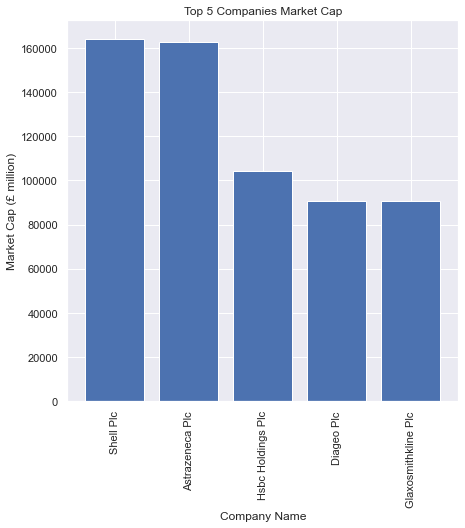

In [78]:
import matplotlib.pyplot as plt
import seaborn as sns

# set seaborn theme
sns.set_theme()

# plot a bar chart
plt.figure(figsize=(7,7))

mc_x = top_5_mc['Company Name']
mc_y = top_5_mc['Market Cap (million)']

plt.xlabel('Company Name')
plt.ylabel('Market Cap (£ million)')
plt.title('Top 5 Companies Market Cap')

plt.xticks(rotation=90)

plt.bar(mc_x, mc_y)
plt.show()

##### Daily price chart for the top 5 market cap companies today

In [79]:
# 5 companies that are top market cap today
top_5_mc['Company Name']

0              Shell Plc
1        Astrazeneca Plc
2      Hsbc Holdings Plc
3             Diageo Plc
4    Glaxosmithkline Plc
Name: Company Name, dtype: object

In [80]:
daily_chart = result[['Date', 'Company Name', 'Price']]
daily_chart = daily_chart[daily_chart['Company Name'].isin(top_5_mc['Company Name'])].reset_index()
daily_chart.drop("index", axis=1, inplace=True)
daily_chart

,Date,Company Name,Price
0,2022-04-18,Diageo Plc,3963.5
1,2022-04-18,Hsbc Holdings Plc,522.4
2,2022-04-18,Shell Plc,2192.0
3,2022-04-18,Astrazeneca Plc,10536.0
4,2022-04-18,Glaxosmithkline Plc,1773.0


In [81]:
# pivot data to plot by company by tranposing data
daily_plot = daily_chart.pivot_table('Price', 'Date' , ['Company Name'])
daily_plot

Company Name,Astrazeneca Plc,Diageo Plc,Glaxosmithkline Plc,Hsbc Holdings Plc,Shell Plc
Date,,,,,
2022-04-18,10536.0,3963.5,1773.0,522.4,2192.0


Text(0, 0.5, 'Price (£)')

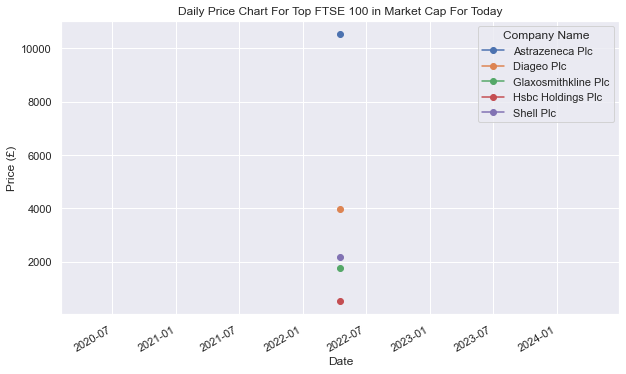

In [82]:
# data will become more populated as days pass
from matplotlib import rcParams

# make it bigger
rcParams['figure.figsize'] = 10,6

# plot
daily_plot.plot(marker='o')

# labelling
plt.title('Daily Price Chart For Top FTSE 100 in Market Cap For Today')
plt.xlabel('Date')
plt.ylabel("Price (£)")

##### What companies have the highest turnover on the 18th of April 2022

In [83]:
turnover_pivot = result.pivot_table('Turnover', index=['Company Name', 'Date'], aggfunc='max').sort_values(by=['Turnover'], ascending=[False]).reset_index()
top_5_turnover_may_18_22 = turnover_pivot[turnover_pivot['Date'] == '2022-04-18'].head(5)
top_5_turnover_may_18_22

,Company Name,Date,Turnover
0,Shell Plc,2022-04-18,2.344532e+08
1,Astrazeneca Plc,2022-04-18,1.803387e+08
2,Hsbc Holdings Plc,2022-04-18,1.369114e+08
3,Glaxosmithkline Plc,2022-04-18,1.281644e+08
4,Glencore Plc,2022-04-18,1.238208e+08


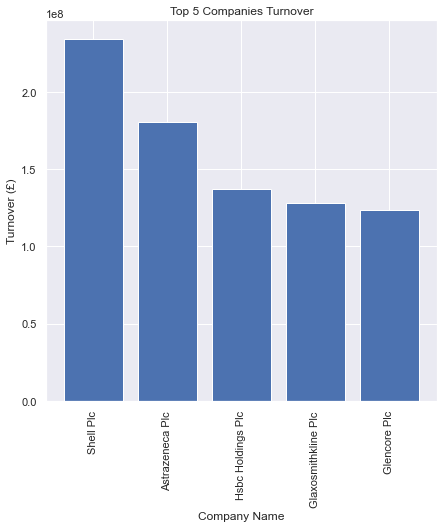

In [84]:
# plot a bar chart
plt.figure(figsize=(7,7))

turnover_x = top_5_turnover_may_18_22['Company Name']
turnover_y = top_5_turnover_may_18_22['Turnover']

plt.xlabel('Company Name')
plt.ylabel('Turnover (£)')
plt.title('Top 5 Companies Turnover')

plt.xticks(rotation=90)

plt.bar(turnover_x, turnover_y)
plt.show()

##### What companies saw the biggest percentage change (positive and negative) today

In [85]:
# to make sure to filter today... (can also order by date like above)
today = pd.Timestamp.today().strftime('%Y-%m-%d')
today

'2022-04-18'

In [86]:
highest_positive_pc = result.pivot_table('Percentage Change', index=['Company Name', 'Date'], aggfunc='max').sort_values(by=['Percentage Change'], ascending=[False]).reset_index().head(1)
highest_positive_pc = highest_positive_pc[highest_positive_pc['Date'] == today]
print(highest_positive_pc)

highest_negative_pc = result.pivot_table('Percentage Change', index=['Company Name', 'Date'], aggfunc='max').sort_values(by=['Percentage Change'], ascending=[True]).reset_index().head(1)
highest_negative_pc = highest_negative_pc[highest_negative_pc['Date'] == today]
print(highest_negative_pc)

                        Company Name       Date  Percentage Change
0  Intercontinental Hotels Group Plc 2022-04-18               4.13
                 Company Name       Date  Percentage Change
0  Dechra Pharmaceuticals Plc 2022-04-18              -6.42


In [87]:
# plot box plot to show better representation
pchange_box = daily_FTSE.pivot_table('Percentage Change', index='Company Name', aggfunc='sum').sort_values(by='Percentage Change', ascending=False).reset_index()

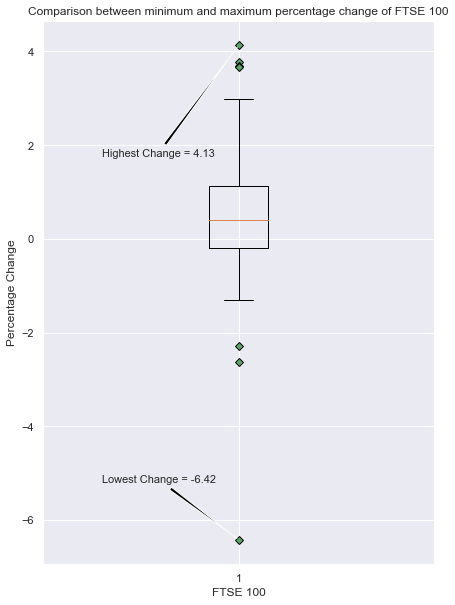

In [88]:
# plot box

# change outliers
green_diamond = dict(markerfacecolor='g', marker='D')

fig3, ax3 = plt.subplots(figsize=(7,10))
ax3.boxplot(pchange_box['Percentage Change'], flierprops=green_diamond)

ax3.set_title('Comparison between minimum and maximum percentage change of FTSE 100')
ax3.set_xlabel('FTSE 100')
ax3.set_ylabel('Percentage Change')

# annotate 
ax3.annotate(
    'Lowest Change = -6.42',
    (1, -6.42),
    xytext=(0.15, 0.15),
    textcoords='axes fraction',
    arrowprops=dict(facecolor='black', arrowstyle='wedge'),
    fontsize=11)
ax3.annotate(
    'Highest Change = 4.13',
    (1, 4.13),
    xytext=(0.15, 0.75),
    textcoords='axes fraction',
    arrowprops=dict(facecolor='black', arrowstyle='wedge'),
    fontsize=11)

plt.show()

##### What is the all time mean volume of FTSE 100

In [89]:
mean_volume = round(daily_FTSE['Volume'].mean())
mean_volume = f"{mean_volume:,}"
mean_volume_df = pd.DataFrame({'FTSE Mean Volume': [mean_volume]})
mean_volume_df

,FTSE Mean Volume
0,"10,733,828"


##### What company was issued the latest and has the highest market cap today

In [90]:
latest_company = result[['Date', 'Company Name', 'Issue Date', 'Market Cap (million)']]
latest_company = latest_company.sort_values(by=['Issue Date', 'Market Cap (million)', 'Date'], ascending=[False,False,False]).reset_index().head(5)
latest_company

,index,Date,Company Name,Issue Date,Market Cap (million)
0,45,2022-04-18,Shell Plc,2022-01-31,164353.93
1,67,2022-04-18,Jd Sports Fashion Plc,2021-11-30,7610.83
2,37,2022-04-18,Berkeley Group Holdings The Plc,2021-09-06,4415.41
3,7,2022-04-18,Melrose Industries Plc,2021-08-31,5262.22
4,81,2022-04-18,Endeavour Mining Plc,2021-06-14,5078.52


##### Compare the top company to the next 4 companies

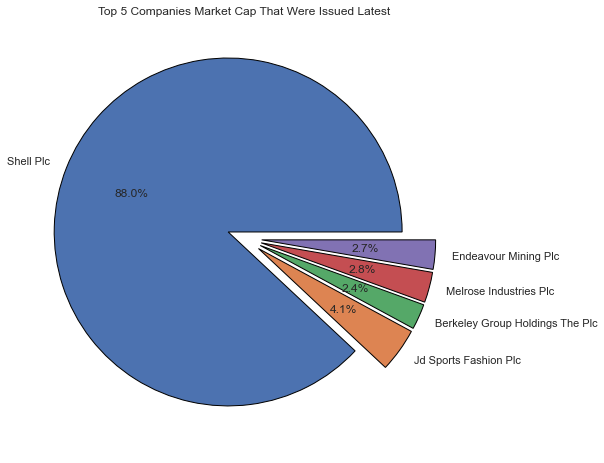

In [91]:
# explode.. make pie chart apart
explode = [0.1, 0.1, 0.1, 0.1, 0.1]

# plot a bar chart
plt.figure(figsize=(8,8))

# bar chart
plt.pie(latest_company['Market Cap (million)'], labels=latest_company['Company Name'], autopct='%1.1f%%', explode=explode, wedgeprops={'edgecolor': 'black'})

# title
plt.title('Top 5 Companies Market Cap That Were Issued Latest')
plt.ticklabel_format(style='plain', axis='y')

##### What company has the highest turnover as well as positive earnings per share  today

In [95]:
turnover_eps = result[['Date', 'Company Name', 'Turnover', 'Earnings Per Share']]
turnover_eps = turnover_eps[turnover_eps['Earnings Per Share'] > 0].sort_values(by=['Turnover', 'Earnings Per Share', 'Date'], ascending=[False,False,False]).reset_index().head(5)
turnover_eps

,index,Date,Company Name,Turnover,Earnings Per Share
0,45,2022-04-18,Shell Plc,2.344532e+08,2.59
1,53,2022-04-18,Astrazeneca Plc,1.803387e+08,0.08
2,33,2022-04-18,Hsbc Holdings Plc,1.369114e+08,0.62
3,83,2022-04-18,Glaxosmithkline Plc,1.281644e+08,0.88
4,42,2022-04-18,Rio Tinto Plc,1.167968e+08,13.03


In [96]:
turnover_eps['Turnover * EPS'] = turnover_eps['Turnover'] * turnover_eps['Earnings Per Share']
turnover_eps.sort_values(by='Turnover * EPS', ascending=False)
turnover_eps.drop("index", axis=1, inplace=True)
turnover_eps

,Date,Company Name,Turnover,Earnings Per Share,Turnover * EPS
0,2022-04-18,Shell Plc,2.344532e+08,2.59,6.072338e+08
1,2022-04-18,Astrazeneca Plc,1.803387e+08,0.08,1.442709e+07
2,2022-04-18,Hsbc Holdings Plc,1.369114e+08,0.62,8.488506e+07
3,2022-04-18,Glaxosmithkline Plc,1.281644e+08,0.88,1.127847e+08
4,2022-04-18,Rio Tinto Plc,1.167968e+08,13.03,1.521862e+09


##### Compare the top company to the next 4 companies

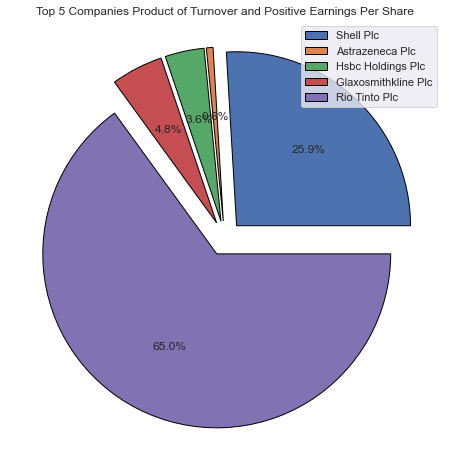

In [102]:
# explode.. make pie chart apart
explode = [0.1, 0.1, 0.1, 0.1, 0.1]

# plot a bar chart
plt.figure(figsize=(8,8))

# bar chart
plt.pie(turnover_eps['Turnover * EPS'], autopct='%1.1f%%', explode=explode, wedgeprops={'edgecolor': 'black'})

# title
plt.title('Top 5 Companies Product of Turnover and Positive Earnings Per Share')
plt.ticklabel_format(style='plain', axis='y')
plt.legend(turnover_eps['Company Name'])
plt.show()

## Historical FTSE 100 Analysis

####  Load data in

In [103]:
historical = pd.read_csv(r"C:\Users\Abdulkadir\Documents\Programming\Personal\DataScience\historicalftse100.csv")
historical

,Date,Price,Open,High,Low,Vol.,Change %
0,"Oct 15, 2020","5,832.52","5,935.06","5,935.06","5,786.20",665.02M,-1.73%
1,"Oct 14, 2020","5,935.06","5,969.71","6,009.81","5,926.49",612.91M,-0.58%
2,"Oct 13, 2020","5,969.71","6,001.38","6,008.04","5,949.97",786.88M,-0.53%
3,"Oct 12, 2020","6,001.38","6,016.65","6,037.08","5,995.11",600.96M,-0.25%
4,"Oct 09, 2020","6,016.65","5,978.03","6,040.47","5,978.03",676.78M,0.65%
...,...,...,...,...,...,...,...
4994,"Jan 09, 2001","6,088.10","6,149.60","6,195.90","6,066.40",-,-1.00%
4995,"Jan 08, 2001","6,149.60","6,198.10","6,212.40","6,137.70",-,-0.78%
4996,"Jan 05, 2001","6,198.10","6,185.60","6,239.60","6,155.00",-,0.20%
4997,"Jan 04, 2001","6,185.60","6,039.90","6,195.30","6,039.90",-,2.41%


#### Clean data

In [104]:
# change date to datetime
historical['Date'] = pd.to_datetime(historical['Date'])

In [105]:
# make new columns for month and year
historical['Month'] = historical['Date'].dt.month
historical['Year'] = historical['Date'].dt.year

####  remove M and B from vol and make it to a number

In [106]:
def converter(x):
    if 'M' in x:
        return f"{(float(x.strip('M'))*1000000):,.2f}"
    elif 'B' in x:
        return f"{(float(x.strip('B'))*1000000000):,.2f}"

In [107]:
# remove M and B from vol and make it to a number
historical['Vol.'] = historical['Vol.'].apply(lambda x: converter(x))

In [108]:
historical.head()

,Date,Price,Open,High,Low,Vol.,Change %,Month,Year
0,2020-10-15,"5,832.52","5,935.06","5,935.06","5,786.20","665,020,000.00",-1.73%,10,2020
1,2020-10-14,"5,935.06","5,969.71","6,009.81","5,926.49","612,910,000.00",-0.58%,10,2020
2,2020-10-13,"5,969.71","6,001.38","6,008.04","5,949.97","786,880,000.00",-0.53%,10,2020
3,2020-10-12,"6,001.38","6,016.65","6,037.08","5,995.11","600,960,000.00",-0.25%,10,2020
4,2020-10-09,"6,016.65","5,978.03","6,040.47","5,978.03","676,780,000.00",0.65%,10,2020


##### remove percentage signs

In [109]:
historical['Change %'] = historical['Change %'].str.strip('%')

In [110]:
historical.head()

,Date,Price,Open,High,Low,Vol.,Change %,Month,Year
0,2020-10-15,"5,832.52","5,935.06","5,935.06","5,786.20","665,020,000.00",-1.73,10,2020
1,2020-10-14,"5,935.06","5,969.71","6,009.81","5,926.49","612,910,000.00",-0.58,10,2020
2,2020-10-13,"5,969.71","6,001.38","6,008.04","5,949.97","786,880,000.00",-0.53,10,2020
3,2020-10-12,"6,001.38","6,016.65","6,037.08","5,995.11","600,960,000.00",-0.25,10,2020
4,2020-10-09,"6,016.65","5,978.03","6,040.47","5,978.03","676,780,000.00",0.65,10,2020


In [111]:
historical_FTSE = historical
historical_FTSE

,Date,Price,Open,High,Low,Vol.,Change %,Month,Year
0,2020-10-15,"5,832.52","5,935.06","5,935.06","5,786.20","665,020,000.00",-1.73,10,2020
1,2020-10-14,"5,935.06","5,969.71","6,009.81","5,926.49","612,910,000.00",-0.58,10,2020
2,2020-10-13,"5,969.71","6,001.38","6,008.04","5,949.97","786,880,000.00",-0.53,10,2020
3,2020-10-12,"6,001.38","6,016.65","6,037.08","5,995.11","600,960,000.00",-0.25,10,2020
4,2020-10-09,"6,016.65","5,978.03","6,040.47","5,978.03","676,780,000.00",0.65,10,2020
...,...,...,...,...,...,...,...,...,...
4994,2001-01-09,"6,088.10","6,149.60","6,195.90","6,066.40",None,-1.00,1,2001
4995,2001-01-08,"6,149.60","6,198.10","6,212.40","6,137.70",None,-0.78,1,2001
4996,2001-01-05,"6,198.10","6,185.60","6,239.60","6,155.00",None,0.20,1,2001
4997,2001-01-04,"6,185.60","6,039.90","6,195.30","6,039.90",None,2.41,1,2001
